In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os,cv2

C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB * 2 of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 10)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

In [3]:
directory="bone_marrow_cell_dataset/"
classses=os.listdir(directory)

In [4]:
import os
import cv2
image_size=224
data1=[]#empty list
for category in classses:
    path = os.path.join(directory, category)
    print(path)
    label = classses.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        arr = cv2.imread(img_path)#Reading Images
        arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
        new_arr = cv2.resize(arr, (image_size, image_size))#Resizing into same shape
        data1.append([new_arr, label])

bone_marrow_cell_dataset/ART
bone_marrow_cell_dataset/BLA
bone_marrow_cell_dataset/EBO
bone_marrow_cell_dataset/EOS
bone_marrow_cell_dataset/LYT
bone_marrow_cell_dataset/MMZ
bone_marrow_cell_dataset/MON
bone_marrow_cell_dataset/MYB
bone_marrow_cell_dataset/NGB
bone_marrow_cell_dataset/NGS
bone_marrow_cell_dataset/NIF
bone_marrow_cell_dataset/PEB
bone_marrow_cell_dataset/PLM
bone_marrow_cell_dataset/PMO


In [5]:
import random
random.shuffle(data1)

In [6]:
len(data1)

7000

In [7]:
classses

['ART',
 'BLA',
 'EBO',
 'EOS',
 'LYT',
 'MMZ',
 'MON',
 'MYB',
 'NGB',
 'NGS',
 'NIF',
 'PEB',
 'PLM',
 'PMO']

In [8]:
x=[]#ndependent
y=[]#dependent
for features,labels in data1:
    x.append(features)
    y.append(labels)

In [9]:
x=np.array(x)
y=np.array(y)
#x=x/255 #feature scaling

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential ,Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense ,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Sequential()
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(classses), activation='softmax'))
model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

In [12]:
progess = model.fit(x=X_train,y=y_train,epochs=1,validation_data= (X_test, y_test))

175/175 [==============================] - 3336s 19s/step - loss: 2.7615 - accuracy: 0.0739 - val_loss: 2.6391 - val_accuracy: 0.0586


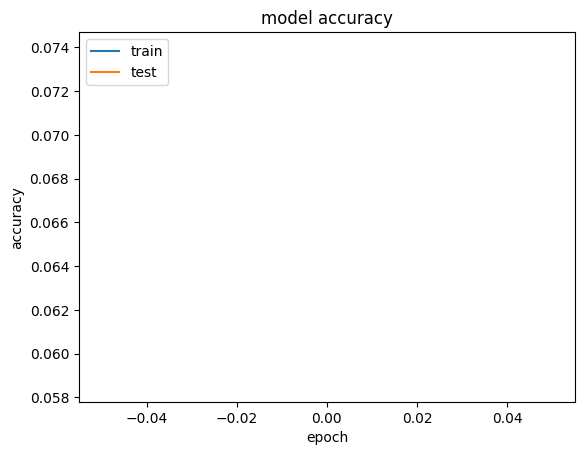

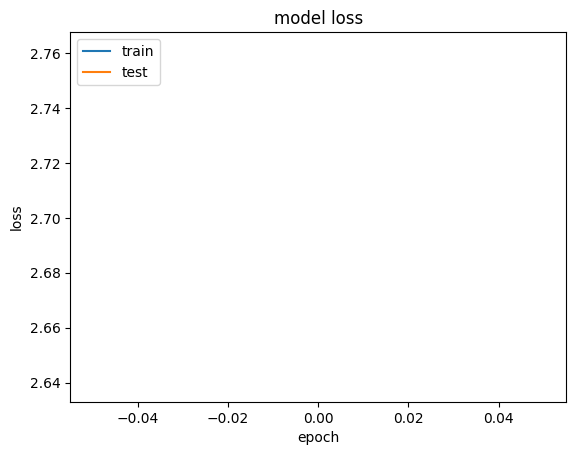

In [13]:
plt.plot(progess.history['accuracy'])
plt.plot(progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess.history['loss'])
plt.plot(progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

In [15]:
y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)
    #break

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new, target_names=classses))

              precision    recall  f1-score   support

         ART       0.00      0.00      0.00       108
         BLA       0.00      0.00      0.00       105
         EBO       0.00      0.00      0.00       103
         EOS       0.00      0.00      0.00        94
         LYT       0.00      0.00      0.00       106
         MMZ       0.00      0.00      0.00        95
         MON       0.06      1.00      0.11        82
         MYB       0.00      0.00      0.00        92
         NGB       0.00      0.00      0.00        99
         NGS       0.00      0.00      0.00       107
         NIF       0.00      0.00      0.00       102
         PEB       0.00      0.00      0.00        96
         PLM       0.00      0.00      0.00       111
         PMO       0.00      0.00      0.00       100

    accuracy                           0.06      1400
   macro avg       0.00      0.07      0.01      1400
weighted avg       0.00      0.06      0.01      1400



C:\Users\sushant\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sushant\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sushant\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

<AxesSubplot:>

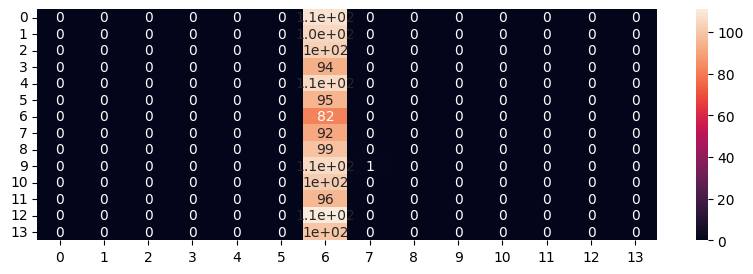

In [17]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [18]:
model.save("model/VGGSKin.hp5")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/VGGSKin.hp5\assets


In [19]:
import os

In [20]:
import os
for i in os.listdir("testing/"):
    print(i)
    
    from tensorflow import keras
    model = keras.models.load_model('model/VGGSKin.hp5')
    from keras.preprocessing import image
    image_size=224
    #img = cv2.imread(path1+"//"+i)
    path="testing/"+i
    img = image.load_img(path, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    print(type(x))
    img_4d=x.reshape(1,224,224,3)
    #img_4d=img_4d/255
    model = keras.models.load_model('model/VGGSKin.hp5')
    predictions = model.predict(img_4d)
    print(predictions[0])
    new_pred=np.argmax(predictions[0])
    print(new_pred)
#     ['COVID19', 'NORMAL', 'OTHERS', 'PNEUMONIA', 'TUBERCOLOSIS']
    dict1={0:'ART',1:'BLA',2:'EBO',3:'EOS',4:'LYT',5:'MMZ',6:'MON',7:'MYB',8:'NGB',9:'NGS',10:'NIF',11:'PEB',12:'PLM',13:'PMO'}
    list1=['ART','BLA','EBO','EOS','LYT','MMZ','MON','MYB','NGB','NGS','NIF','PEB','PLM','PMO']
    a=dict1[new_pred]
    
    print(str(a)+" Detected in Image")
    print("-----------------------------------------------")
    #break



ART_00009.jpg


Using TensorFlow backend.


<class 'numpy.ndarray'>
[0.07161421 0.07149373 0.07152458 0.0715449  0.07148767 0.07139453
 0.07176259 0.07172848 0.07133742 0.07115402 0.07109497 0.07133149
 0.07142376 0.07110766]
6
MON Detected in Image
-----------------------------------------------
BLA_00009.jpg
<class 'numpy.ndarray'>
[0.07161421 0.07149373 0.07152458 0.0715449  0.07148767 0.07139453
 0.07176259 0.07172848 0.07133742 0.07115402 0.07109497 0.07133149
 0.07142376 0.07110766]
6
MON Detected in Image
-----------------------------------------------
EBO_00009.jpg
<class 'numpy.ndarray'>
[0.07161421 0.07149373 0.07152458 0.0715449  0.07148767 0.07139453
 0.07176259 0.07172848 0.07133742 0.07115402 0.07109497 0.07133149
 0.07142376 0.07110766]
6
MON Detected in Image
-----------------------------------------------
EOS_00009.jpg
<class 'numpy.ndarray'>
[0.07161421 0.07149373 0.07152458 0.0715449  0.07148767 0.07139453
 0.07176259 0.07172848 0.07133742 0.07115402 0.07109497 0.07133149
 0.07142376 0.07110766]
6
MON Detected

[0.07161421 0.07149373 0.07152458 0.0715449  0.07148767 0.07139453
 0.07176259 0.07172848 0.07133742 0.07115402 0.07109497 0.07133149
 0.07142376 0.07110766]
6
MON Detected in Image
-----------------------------------------------
PEB_00009.jpg
<class 'numpy.ndarray'>
[0.07161421 0.07149373 0.07152458 0.0715449  0.07148767 0.07139453
 0.07176259 0.07172848 0.07133742 0.07115402 0.07109497 0.07133149
 0.07142376 0.07110766]
6
MON Detected in Image
-----------------------------------------------
PLM_00009.jpg
<class 'numpy.ndarray'>
[0.07161421 0.07149373 0.07152458 0.0715449  0.07148767 0.07139453
 0.07176259 0.07172848 0.07133742 0.07115402 0.07109497 0.07133149
 0.07142376 0.07110766]
6
MON Detected in Image
-----------------------------------------------
PMO_00009.jpg
<class 'numpy.ndarray'>
[0.07161421 0.07149373 0.07152458 0.0715449  0.07148767 0.07139453
 0.07176259 0.07172848 0.07133742 0.07115402 0.07109497 0.07133149
 0.07142376 0.07110766]
6
MON Detected in Image
--------------